In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filters_models = pd.read_pickle("filters-models.pkl")
filters_models.head()

,fish_id,zone,input_noise_std,model_id,model_filter,model_bias,train_error,valid_error
0,fish,dlz,0.05,0,"[0.017569115, 0.0031394341, -0.01539016, -0.00...",-0.125259,0.234976,0.223262
1,fish,dlz,0.05,1,"[0.017569115, 0.0031394341, -0.01539016, -0.00...",-0.112887,0.229159,0.227332
2,fish,dlz,0.05,10,"[0.017569115, 0.0031394341, -0.01539016, -0.00...",-0.088350,0.233271,0.237094
3,fish,dlz,0.05,11,"[0.017569115, 0.0031394341, -0.01539016, -0.00...",-0.070196,0.231950,0.232991
4,fish,dlz,0.05,12,"[0.017569115, 0.0031394341, -0.01539016, -0.00...",-0.076064,0.228166,0.231957


### Plot distributions of train and valid errors

In [3]:
train_errors = filters_models[["input_noise_std", "train_error", "zone"]].copy()
train_errors["error"] = train_errors["train_error"]
train_errors.drop(columns="train_error", inplace=True)
train_errors["set"] = "train"

valid_errors = filters_models[["input_noise_std", "valid_error", "zone"]].copy()
valid_errors["error"] = valid_errors["valid_error"]
valid_errors.drop(columns="valid_error", inplace=True)
valid_errors["set"] = "valid"

filters_models_errors = pd.concat(
    [train_errors, valid_errors],
    axis=0,
    ignore_index=True,
)

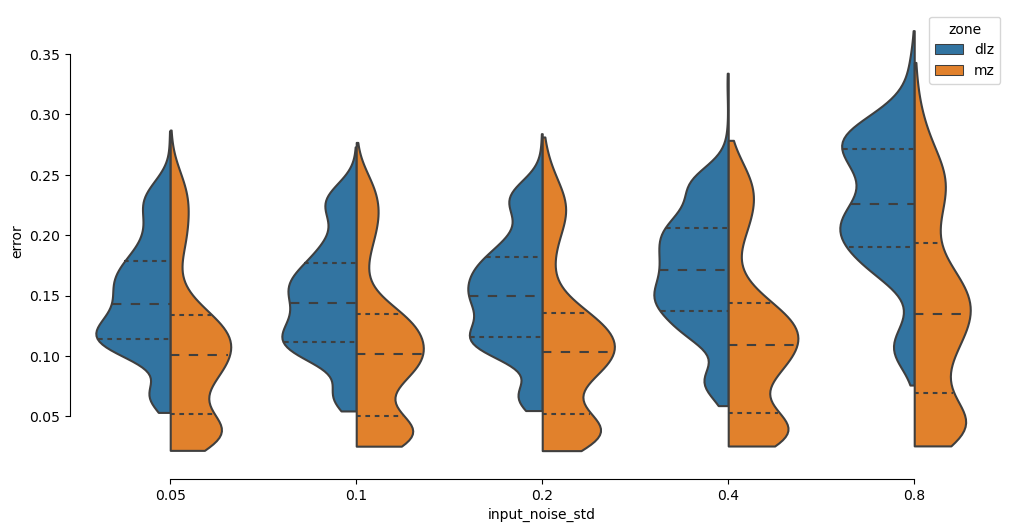

In [4]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=valid_errors, x="input_noise_std", y="error", hue="zone", cut=0, split=True, inner="quart")
# sns.violinplot(data=filters_models_errors, x="input_noise_std", y="error", hue="set", cut=0, split=True, inner="quart")
# sns.violinplot(data=filters_models_errors[filters_models_errors["zone"]=="mz"], x="input_noise_std", y="error", hue="set", cut=0, split=True, inner="quart")
# sns.violinplot(data=filters_models_errors[filters_models_errors["zone"]=="dlz"], x="input_noise_std", y="error", hue="set", cut=0, split=True, inner="quart")
sns.despine(offset=5, trim=True)